In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')






In [7]:
#for google.colab import files
#uploaded = files.upload()

#for jupyter
df = pd.read_csv("/home/hp/Desktop/NLP/dataset/UpdatedResumeDataSet.csv")



In [8]:
#it gives first five rows of dataframe
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [9]:
# Create a DataFrame from the data
df2 = pd.DataFrame(df)

# Define Sentences
Sentences = df2['Resume'].values
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [10]:
#returns a tuple that conatin rows & column
df.shape

(962, 2)

In [11]:
#provide summary of pandas dataframe metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [12]:
#returns number of  misssing/null values in dataframe
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [13]:
#returns an array of unique values
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [14]:
#returns categories in unique column and category which contais unique values

categories = df['Category'].value_counts().reset_index()
categories

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


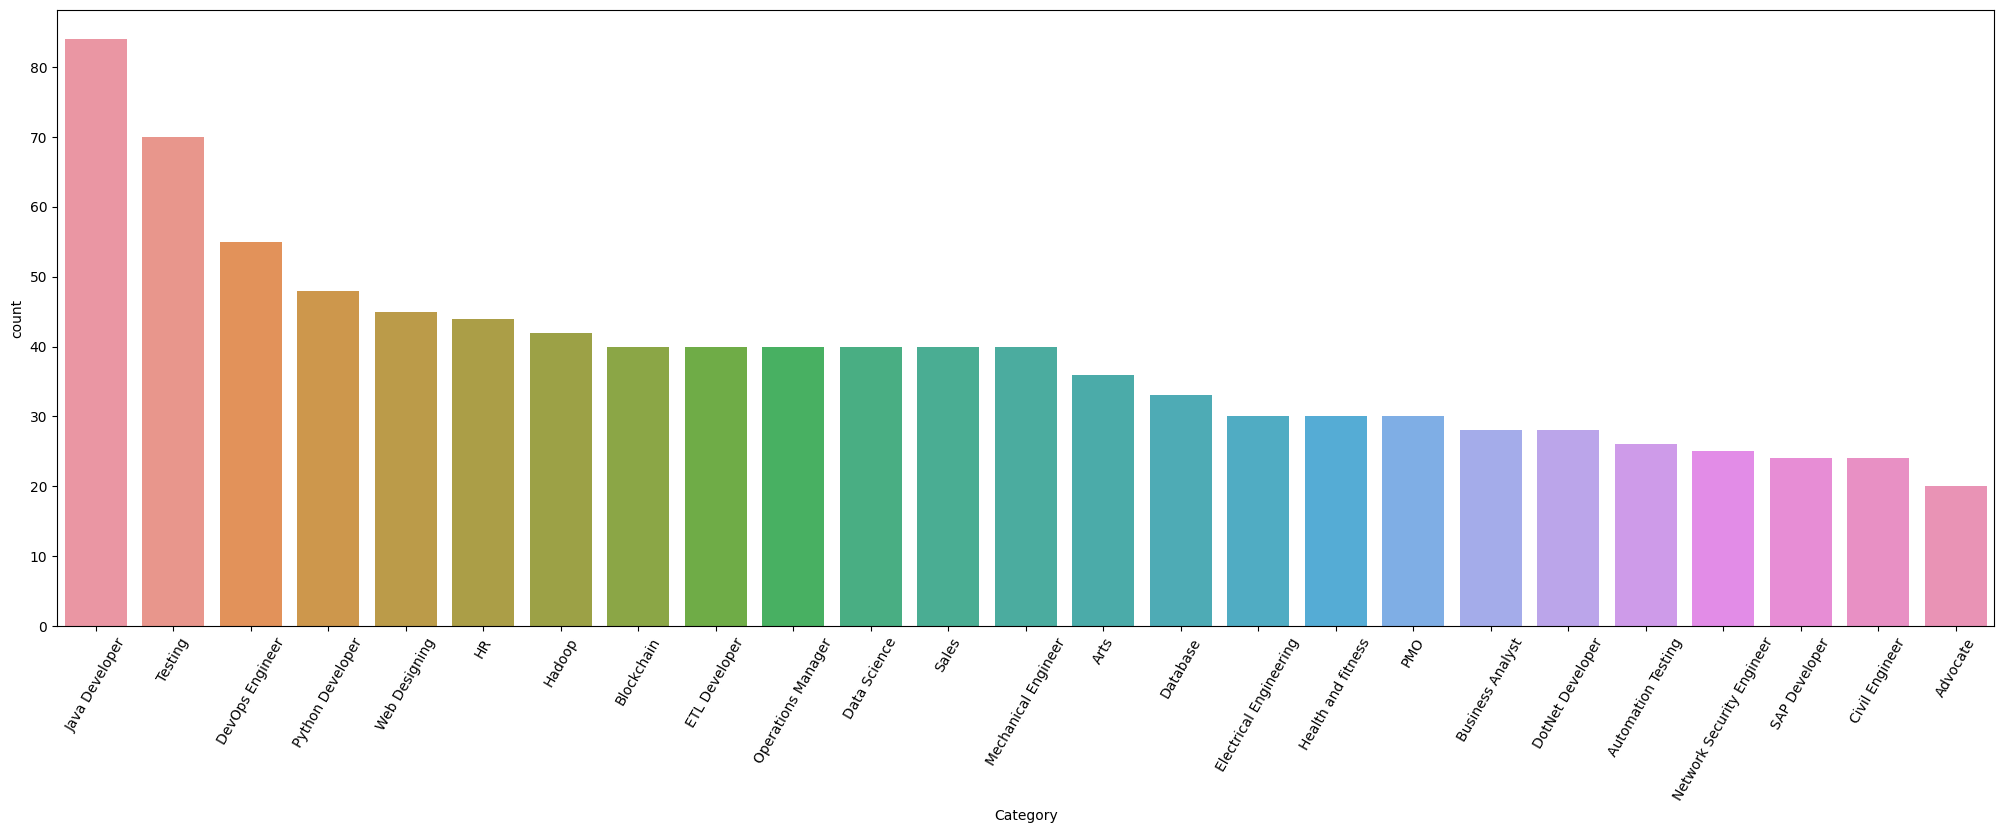

In [15]:
#creating count plot using seaborn library

plt.figure(figsize=(25,8))
plt.xticks(rotation=60)
#Count plot on single categorical variable
sns.countplot(x='Category', data=df,order= df['Category'].value_counts().index)

#Show the plot
plt.show()

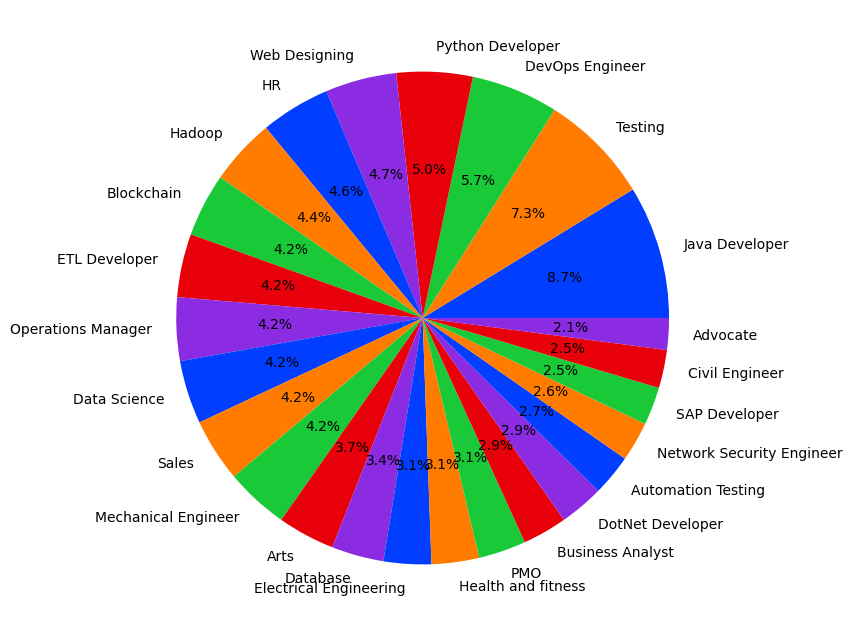

In [16]:
plt.figure(figsize=(25,8))

#define Seaborn color palette to use
colors= sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(categories['Category'], labels=categories['index'], colors = colors, autopct= '%.1f%%')
plt.show()

In [17]:
#It create new dataframe df1 from existing one
df1= df.copy()
#it creates new column name cleaned_resume
df1['cleaned_resume']= ""
df1

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [18]:
# removing unwanted element from data

import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText


In [19]:
#in cleaned resume colum contain cleaned data
df1['cleaned_resume'] = df1['Resume'].apply(lambda x: clean_function(x))
df1.head()



,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [20]:
from sklearn.preprocessing import LabelEncoder
# df2 is the copy of dataframe df1
df2= df1.copy()
#labelenocder function used to enode categorical values into integer values for ML algo that require numerical input
df2['Category']= LabelEncoder().fit_transform(df2['Category'])
df2.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [21]:
#download stopwards corpous from nltk library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/hp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.9/458.9 kB 526.7 kB/s eta 0:00:000:00:010:00:01:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
import nltk
from nltk.corpus import stopwords
#string modules provide set of commonly used string operation
import string
#wordclud library used to create wordcloud from given text data

from wordcloud import WordCloud

In [23]:
#creates set of stopwards and add two additional stopwards ['``',"''"]

SetOfStopWords= set(stopwords.words('english')+['``',"''"])



In [32]:
#is an empty list used to store all the words extracted from cleaned resume 
#this word will later use to calculate their frequency
totalWords= []

In [33]:
#senetences is an numpy array is used to store all the words extracted from the cleaned resumes
Sentences= df2['Resume'].values

In [41]:
''' cleanedSentences is an empty string that is being used to store the 
cleaned text data of all the resumes in the Sentences array.'''

cleanedSentences= ""


In [35]:
import nltk
nltk.download('punkt')
# download the punkt tokenizer from nltk library

[nltk_data] Downloading package punkt to /home/hp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
#tokenizes the senetences into words & remove stopwords & punctuation
for records in Sentences:
    cleanedText= clean_function(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

In [29]:
# in this we import freq.Dist function from nltk & count the frequency of
#individual tokens in this case separeare word except stopward & punctuation

wordreqdist = nltk.FreqDist(totalWords)

In [42]:
''' wordreqdist appears to be a frequency distribution object created using the nltk.FreqDist() function. It contains the frequency distribution of words in the 
resumes after removing stopwords and punctuation. '''


wordreqdist

FreqDist({'Exprience': 3829, 'months': 3233, 'company': 3130, 'Details': 2967, 'description': 2634, '1': 2134, 'Project': 1808, 'project': 1579, '6': 1499, 'data': 1438, ...})

In [43]:
mostcommon = wordreqdist.most_common(30)

''' most_common() is a method of the nltk.FreqDist class that returns a list of the n most common elements and their counts from 
the frequency distribution.'''

In [44]:
mostcommon

[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('1', 2134),
 ('Project', 1808),
 ('project', 1579),
 ('6', 1499),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385),
 ('year', 1244),
 ('Less', 1137),
 ('January', 1086),
 ('using', 1041),
 ('Skill', 1018),
 ('Pune', 1016),
 ('Management', 1010),
 ('SQL', 990),
 ('Ltd', 934),
 ('management', 927),
 ('C', 896),
 ('Engineering', 855),
 ('Education', 833),
 ('Developer', 806),
 ('Java', 773),
 ('2', 754),
 ('development', 752),
 ('monthsCompany', 746)]

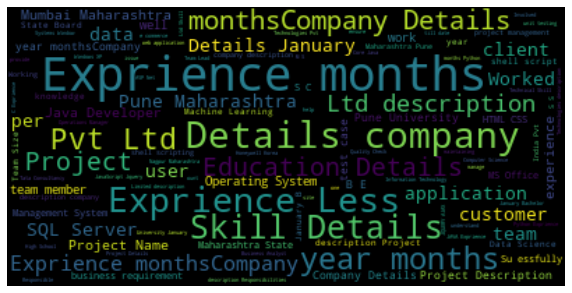

In [28]:
WordCloud= WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
'''
train_test_split is used to split the dataset into a training set and a testing set. 
The purpose of this is to evaluate the performance of the machine
learning model on data it has not seen before, and to prevent overfitting
'''
from sklearn.model_selection import train_test_split

'''
TfidfVectorizer is used to convert the textual data into a numeric format that can be processed by 
machine learning algorithms
'''
from sklearn.feature_extraction.text import TfidfVectorizer

'''
 hstack is used to concatenate the feature vectors obtained from the TfidfVectorizer with
 any other feature vectors that may be used for classification, 
 such as numerical or categorical features.
'''

from scipy.sparse import hstack

In [45]:
'''
These lines of code are creating two arrays, Text and Target, from the cleaned resume data in df2 and the 
corresponding job categories.
'''

Text= df2['cleaned_resume'].values
Target= df2['Category'].values

In [31]:
'''
These lines of code are using TfidfVectorizer from scikit-learn to convert the Text array into a matrix of
TF-IDF features, WordFeatures.
'''

word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(Text)
WordFeatures= word_vectorizer.transform(Text)


In [32]:
WordFeatures.shape

(962, 7351)

In [33]:
'''
This code is splitting the WordFeatures matrix and the Target array into training and testing sets. The training set will be used to fit a model, while the testing set will 
be used to evaluate the model's performance.
'''

X_train,X_test,y_train,y_test= train_test_split(WordFeatures, Target, random_state=42)



In [34]:
print(X_train.shape)
print(X_test.shape)

(721, 7351)
(241, 7351)


In [35]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier



In [36]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier()    
}

In [37]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier())]

In [38]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'{i} trained')

print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
************************************************************
all models trained


In [39]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(X_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(X_test, y_test))
    print("*"*100)

print("all scores calculated")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.9805825242718447
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.966804979253112
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.991701244813278
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.991701244813278
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on t

In [40]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report



In [41]:
for count, value in enumerate(model_list):
    print(f'{value} classification report')
    print("-"*80)
    print(classification_report(y_test, model_list[count].predict(X_test)))
    print("*"*100)
    print(" ")


OneVsRestClassifier(estimator=KNeighborsClassifier()) classification report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         9
           6       0.88      0.78      0.82         9
           7       1.00      0.89      0.94         9
           8       1.00      0.88      0.94        17
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00         6
          14       1.00      0.7

In [42]:
from sklearn.model_selection import cross_val_score, KFold

In [43]:
results = {}

kf = KFold(n_splits= 10)

for count, value in enumerate(model_list):
    result = cross_val_score(model_list[count], X_train, y_train, scoring= 'accuracy', cv= kf)
    results[value] = result


In [44]:
print("r2 scores")
print("*********************************")
for name, result in results.items():
   
    print(f'{name} : {round(np.mean(result),3)}')
    print("----------------")


r2 scores
*********************************
OneVsRestClassifier(estimator=KNeighborsClassifier()) : 0.958
----------------
OneVsRestClassifier(estimator=LogisticRegression()) : 0.99
----------------
OneVsRestClassifier(estimator=SVC()) : 0.997
----------------
OneVsRestClassifier(estimator=RandomForestClassifier()) : 0.992
----------------


In [47]:
import pickle

file = open('project_model.pk', 'wb')
pickle.dump(models['Random Forest'], file)
file.close()

In [46]:
file1 = open('vectorizer.pk','wb')
pickle.dump(WordFeatures,file1)
file1.close()